In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')
#from pandas_profiling import ProfileReport
%matplotlib inline

# Carregando os dados

In [42]:
df = pd.read_csv('../input/renner_desafio_pucrs_treino.csv')
df.head()

,item,cod_loja,semana_comercial,data_semana_comercial,venda,categoria_loja,localidade,loja_tamanho,clima
0,100342,58,202130,2021-07-25,51,fisica,br,G,RIO
1,100342,63,202221,2022-05-22,86,fisica,br,G,RIO
2,100342,84,202131,2021-08-01,62,fisica,br,G,RIO
3,100342,2,202222,2022-05-29,171,fisica,br,G,SUL
4,100342,407,202223,2022-06-05,188,web,br,GG,W


# Explorando os dados

In [5]:
#Gerando o Profile Report
#profile = ProfileReport(df)
#profile.to_file('profile_output.html')

In [6]:
df.shape

(92877, 9)

In [7]:
df.isna().sum()

item                     0
cod_loja                 0
semana_comercial         0
data_semana_comercial    0
venda                    0
categoria_loja           0
localidade               0
loja_tamanho             0
clima                    0
dtype: int64

In [8]:
df.describe()

,item,cod_loja,semana_comercial,venda
count,92877.0,92877.000000,92877.000000,92877.000000
mean,100342.0,176.024742,201975.466036,26.485158
std,0.0,107.675970,163.395399,71.062728
min,100342.0,1.000000,201701.000000,-4.000000
25%,100342.0,84.000000,201831.000000,5.000000
50%,100342.0,170.000000,201951.000000,14.000000
75%,100342.0,260.000000,202123.000000,30.000000
max,100342.0,420.000000,202234.000000,5476.000000


In [9]:
df.duplicated().sum()

0

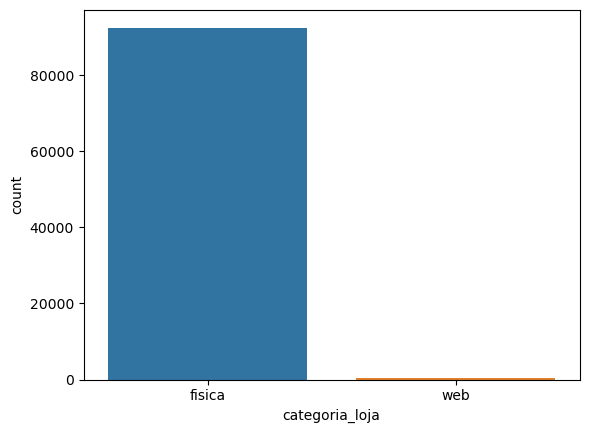

In [10]:
#Quantidade de lojas fisicas e lojas web
sns.countplot(x='categoria_loja', data=df)
plt.show()

<Axes: xlabel='categoria_loja', ylabel='venda'>

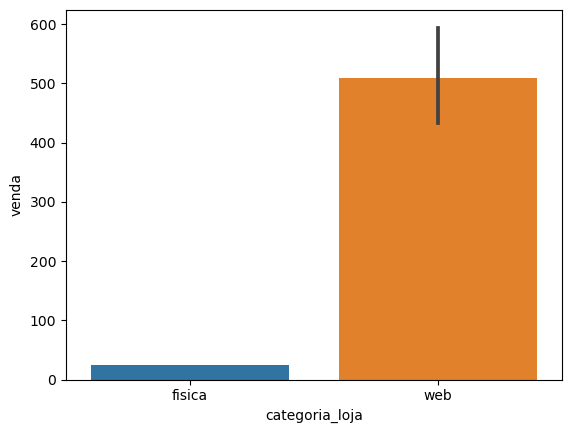

In [11]:
#Quantidade de venda por cat. de loja
sns.barplot(x='categoria_loja', y='venda', data=df)

In [12]:
print(df['venda'].min())
print(df['venda'].max())

-4
5476


In [13]:
df[df['venda'] < 0]

,item,cod_loja,semana_comercial,data_semana_comercial,venda,categoria_loja,localidade,loja_tamanho,clima
900,100342,12,201743,2017-10-22,-1,fisica,br,G,SUL
1596,100342,321,201943,2019-10-27,-2,fisica,br,P,SPO
1791,100342,270,202007,2020-02-16,-1,fisica,br,M,SUL
1837,100342,273,202138,2021-09-19,-2,fisica,br,P,RIO
1983,100342,111,202203,2022-01-16,-1,fisica,br,M,RIO
...,...,...,...,...,...,...,...,...,...
92827,100342,58,202001,2020-01-05,-1,fisica,br,G,RIO
92846,100342,323,202145,2021-11-07,-1,fisica,br,P,NOR
92850,100342,171,201826,2018-07-01,-1,fisica,br,P,SPO
92858,100342,312,201745,2017-11-05,-1,fisica,br,M,SUL


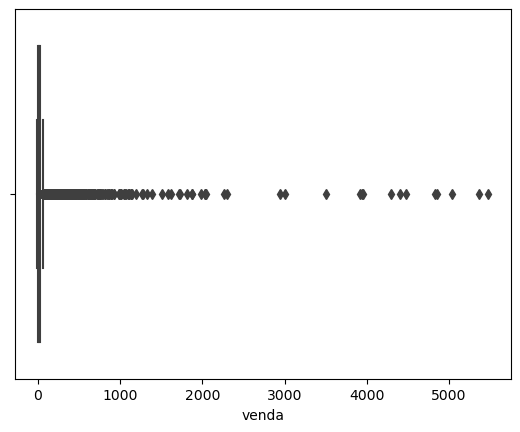

In [14]:
sns.boxplot(x=df['venda'])
plt.show()

## Insights/anotações iniciais


*   Sem dados nulos, faltantes ou duplicados;
*   Colunas desnecessárias para o treinamento (dropar): Item, semana_comercial (recomendação do Hollisson);
*   Garantir que exista 1 linha por item, loja e data_semana_comercial (recomendação do Hollisson);
*   Possuimos somente duas lojas web, mas mesmo assim a quantidade de venda é muito maior do que a venda nas lojas físicas. Talvez, seja interessante separar modelos diferentes para cada tipo de loja;
*   Lojas web: cod 406 e 407 - todas tem: localidade = br, tamanho = gg, clima = w
*   Temos linhas com a quantidade de venda negativa (520 de 92877), fazer o tratamento;


# Tratamentos inicias
*   Dropar colunas desnecessárias
*   Alterar valores negativos de venda para zero
*   Tratar linhas duplicadas após dropar 'semana_comercial'
*   Garantir uma linha por item, loja e data_semana_comercial
*   Alterar variaveis categóricas para variaveis numéricas
*   Separar entre dataset de treino para loja fisica e web
*   Dropas colunas desnecessárias para o dataset web

In [15]:
df.head(2)

,item,cod_loja,semana_comercial,data_semana_comercial,venda,categoria_loja,localidade,loja_tamanho,clima
0,100342,58,202130,2021-07-25,51,fisica,br,G,RIO
1,100342,63,202221,2022-05-22,86,fisica,br,G,RIO


In [16]:
del df['item']
del df['semana_comercial']
df.head(2)

,cod_loja,data_semana_comercial,venda,categoria_loja,localidade,loja_tamanho,clima
0,58,2021-07-25,51,fisica,br,G,RIO
1,63,2022-05-22,86,fisica,br,G,RIO


In [17]:
df[df['venda'] < 0]

,cod_loja,data_semana_comercial,venda,categoria_loja,localidade,loja_tamanho,clima
900,12,2017-10-22,-1,fisica,br,G,SUL
1596,321,2019-10-27,-2,fisica,br,P,SPO
1791,270,2020-02-16,-1,fisica,br,M,SUL
1837,273,2021-09-19,-2,fisica,br,P,RIO
1983,111,2022-01-16,-1,fisica,br,M,RIO
...,...,...,...,...,...,...,...
92827,58,2020-01-05,-1,fisica,br,G,RIO
92846,323,2021-11-07,-1,fisica,br,P,NOR
92850,171,2018-07-01,-1,fisica,br,P,SPO
92858,312,2017-11-05,-1,fisica,br,M,SUL


In [18]:
df['venda'] = df[df['venda'] < 0 ] = 0
df[df['venda'] < 0]

,cod_loja,data_semana_comercial,venda,categoria_loja,localidade,loja_tamanho,clima


In [43]:
df[df.duplicated()]

,item,cod_loja,semana_comercial,data_semana_comercial,venda,categoria_loja,localidade,loja_tamanho,clima


*   A maioria das linhas com semana_comercial e cod_loja são as que estavam com valores negativos, talvez seja interessante dropa-las

In [32]:
df

,item,cod_loja,semana_comercial,data_semana_comercial,venda,categoria_loja,localidade,loja_tamanho,clima
0,100342,58,202130,2021-07-25,51,fisica,br,G,RIO
1,100342,63,202221,2022-05-22,86,fisica,br,G,RIO
2,100342,84,202131,2021-08-01,62,fisica,br,G,RIO
3,100342,2,202222,2022-05-29,171,fisica,br,G,SUL
4,100342,407,202223,2022-06-05,188,web,br,GG,W
...,...,...,...,...,...,...,...,...,...
92872,100342,65,202052,2020-12-27,1,fisica,br,M,SUL
92873,100342,97,201853,2017-12-31,1,fisica,br,P,NOR
92874,100342,315,201831,2018-08-05,1,fisica,br,P,NOR
92875,100342,163,201950,2019-12-15,-1,fisica,br,M,SPO


In [40]:
# Agrupa o dataset por data_semana_comercial, mas somando somente as vendas e mantendo as outras colunas iguais
df_agrupado = df.groupby('data_semana_comercial').agg(
                                                    {'venda': 'sum', 
                                                    'cod_loja': 'first', 
                                                    'categoria_loja': 'first', 
                                                    'localidade': 'first', 
                                                    'loja_tamanho': 'first', 
                                                    'clima': 'first'}).reset_index()

In [39]:
df_agrupado.head()

,data_semana_comercial,venda,cod_loja,categoria_loja,localidade,loja_tamanho,clima
0,2017-01-01,377,47,fisica,br,M,SPO
1,2017-01-08,337,150,fisica,br,G,RIO
2,2017-01-15,285,132,fisica,br,P,SUL
3,2017-01-22,302,43,fisica,br,M,SPO
4,2017-01-29,847,67,fisica,br,M,SUL


In [38]:
df_agrupado[df_agrupado.duplicated()]

,data_semana_comercial,venda,cod_loja,categoria_loja,localidade,loja_tamanho,clima


In [44]:
df.data_semana_comercial.value_counts()

2020-12-27    469
2018-12-30    443
2019-12-29    435
2017-12-31    430
2022-07-03    402
             ... 
2020-04-19     26
2020-04-05      1
2020-03-22      1
2020-03-29      1
2020-04-12      1
Name: data_semana_comercial, Length: 295, dtype: int64